# Overview 

This notebook contains all code and discussions for the __novice iteration__ of the research question involving __the distribution of different lesions__. The specific question asked, what is the distribution of the different types of lesion diagnosis? We specifically want to know if it is skewed.  At the novice level, this requires data acquisition and minimal pre-processing, coupled with exploratory charts.
  


# Table of Contents

1. [Setup](#setup) <br>
2. [Data Loading](#load) <br>

3. [Data wrangling](#dw) <br>
    i. [Population](#pop) <br>

4. [Visualization](#viz)
5. [Discussion](#Discuss)

<a id='setup'></a>
# Setup
Import packages

In [1]:
import PIL
import os
from os import listdir
from os.path import isfile, join
import json
import numpy as np
import seaborn as sns # pip install -U seaborn
from matplotlib import pyplot as plt
import pandas as pd
import glob
import warnings
import matplotlib
warnings.filterwarnings('ignore')

# Load data from directories <a id='load'></a>
Find current working directory

Create paths to image and description folders

In [2]:
img_filepaths = glob.glob('../../sample_imgs/*.jp*')
seg_filepaths = glob.glob('../../sample_segs/*.png')
des_paths = glob.glob('../../sample_dscs/*')

# Data wrangling <a id='dw'></a>

In [3]:
age = []
lesion_diagnosis = []

### Populate the above lists by reading in data from the JSON files  <a id="pop"></a>
We also have to make sure that the user gives us both 

In [4]:
for i in range(len(des_paths)):
    im = des_paths[i]
    with open(im) as json_file:
        j = json.load(json_file)
        
        # To view json format uncomment the two lines below 
        #print(json.dumps(j, indent=4))
        #break
        
        try:
            # Add all lesion diagnoses to the lesion diagnosis list
            lesion_diagnosis.append(j["meta"]["clinical"]["diagnosis"])
            
            # Add their age to the age list
            age.append("Place holder Age")
        except KeyError:
            continue

Dataframe building for easy visualization.

In [5]:
diagnosis_data = pd.DataFrame({'Diagnosis': lesion_diagnosis, 'Age': age})
diagnosis_data = diagnosis_data.dropna()

Here we create a csv file with the counts of all lesion diagnoses, we'll use this later :) 

In [6]:
diagnosis_distribution = diagnosis_data.groupby(by='Diagnosis').agg('count').rename(columns={"Age": "Count"})

diagnosis_distribution.to_csv(path_or_buf='../diagnosis_distribution.csv')

# Visualization <a id='viz'></a>

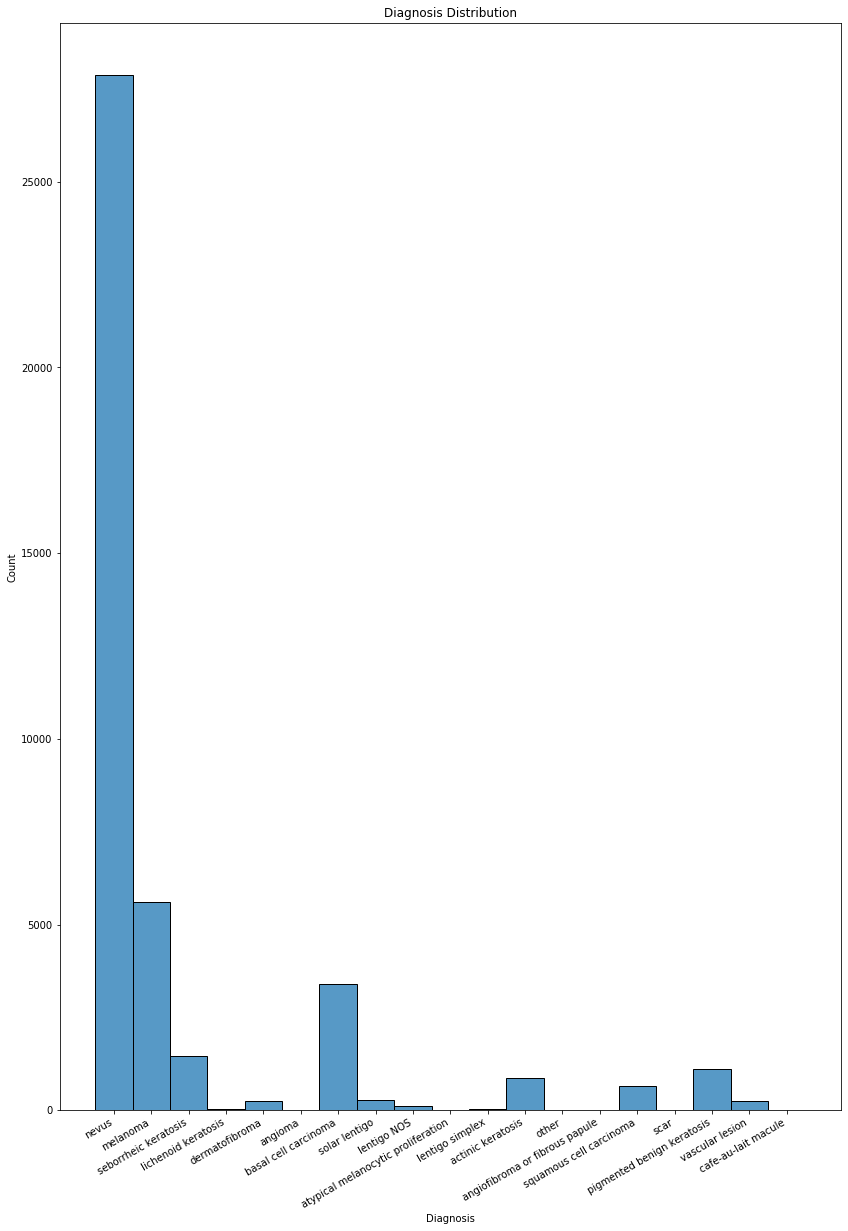

In [7]:
fig = plt.figure(figsize=(14,20))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
ax = plt.gca()
plt.title("Diagnosis Distribution")
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
sns.histplot(diagnosis_data, x='Diagnosis')

plt.savefig("../novice_Q3.png")
plt.show()

# What did you find out about the distribution of lesion diagnoses? <a id="Discuss"></a>
Does it resemble a common distribution?